**Importing all the necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import keras

np.random.seed(2)
%matplotlib inline

**Reading the Dataset**

In [3]:
data = pd.read_csv('/content/creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

<Axes: title={'center': 'Correlation with class'}>

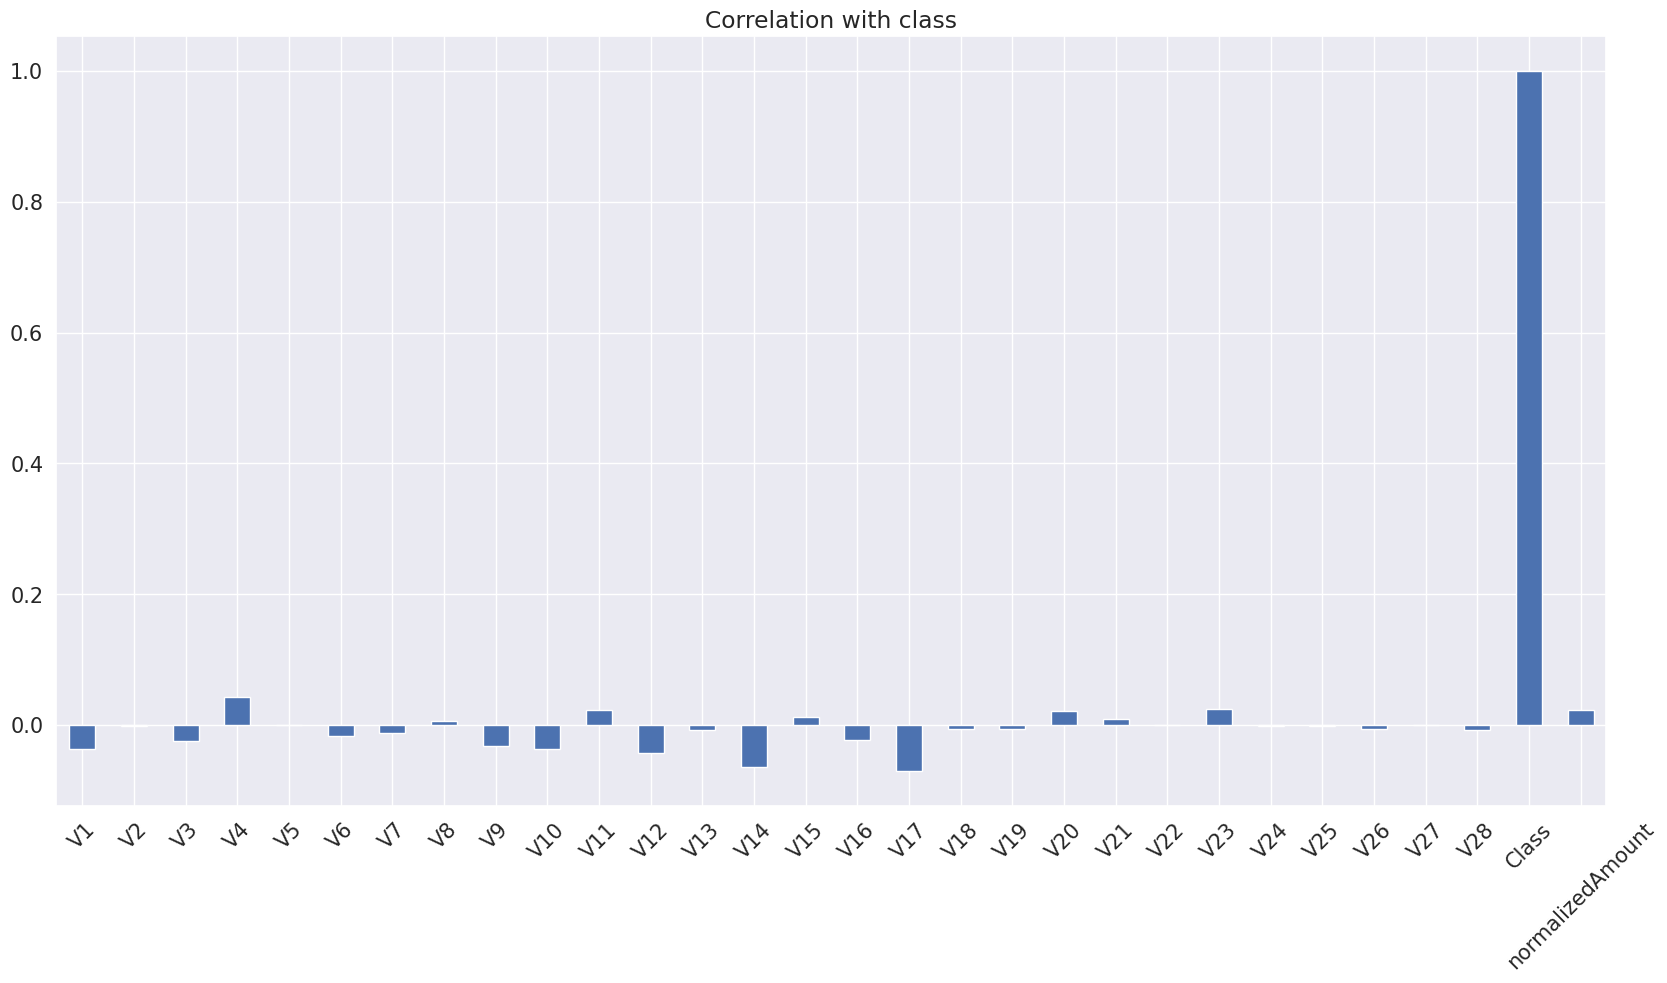

In [40]:
data.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

In [7]:
sn.set(style="white")


corr = data.corr()
corr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.000414,0.023605,0.027055,0.064945,0.041564,0.092181,-0.105473,0.017927,0.427499,...,-0.068461,-0.071659,0.035577,-0.002316,-0.035713,-0.084701,-0.055814,0.028557,-0.002898,-0.011397
V1,-0.000414,1.000000,-0.204265,-0.195230,0.089013,-0.098441,0.018026,-0.113463,0.216413,-0.120341,...,-0.126873,-0.083443,-0.131718,0.016486,0.300709,-0.070399,-0.057779,-0.003473,-0.168783,-0.036739
V2,0.023605,-0.204265,1.000000,0.023919,0.039223,0.064890,-0.070527,0.132811,-0.191545,0.026080,...,0.062378,-0.050443,0.060974,-0.028185,-0.167491,-0.030538,0.135955,-0.077480,-0.501780,-0.001872
V3,0.027055,-0.195230,0.023919,1.000000,0.205319,-0.097368,-0.238108,0.031793,0.031948,0.058498,...,0.021769,0.294036,-0.022193,-0.052483,-0.289372,0.112200,-0.123658,-0.130909,-0.217583,-0.024730
V4,0.064945,0.089013,0.039223,0.205319,1.000000,-0.145946,0.003967,-0.009356,0.036508,-0.101747,...,-0.029604,0.024582,0.037749,-0.069135,-0.034917,0.148310,-0.085996,0.027379,0.104263,0.043025


<ipython-input-8-48b46ed1aa8e>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

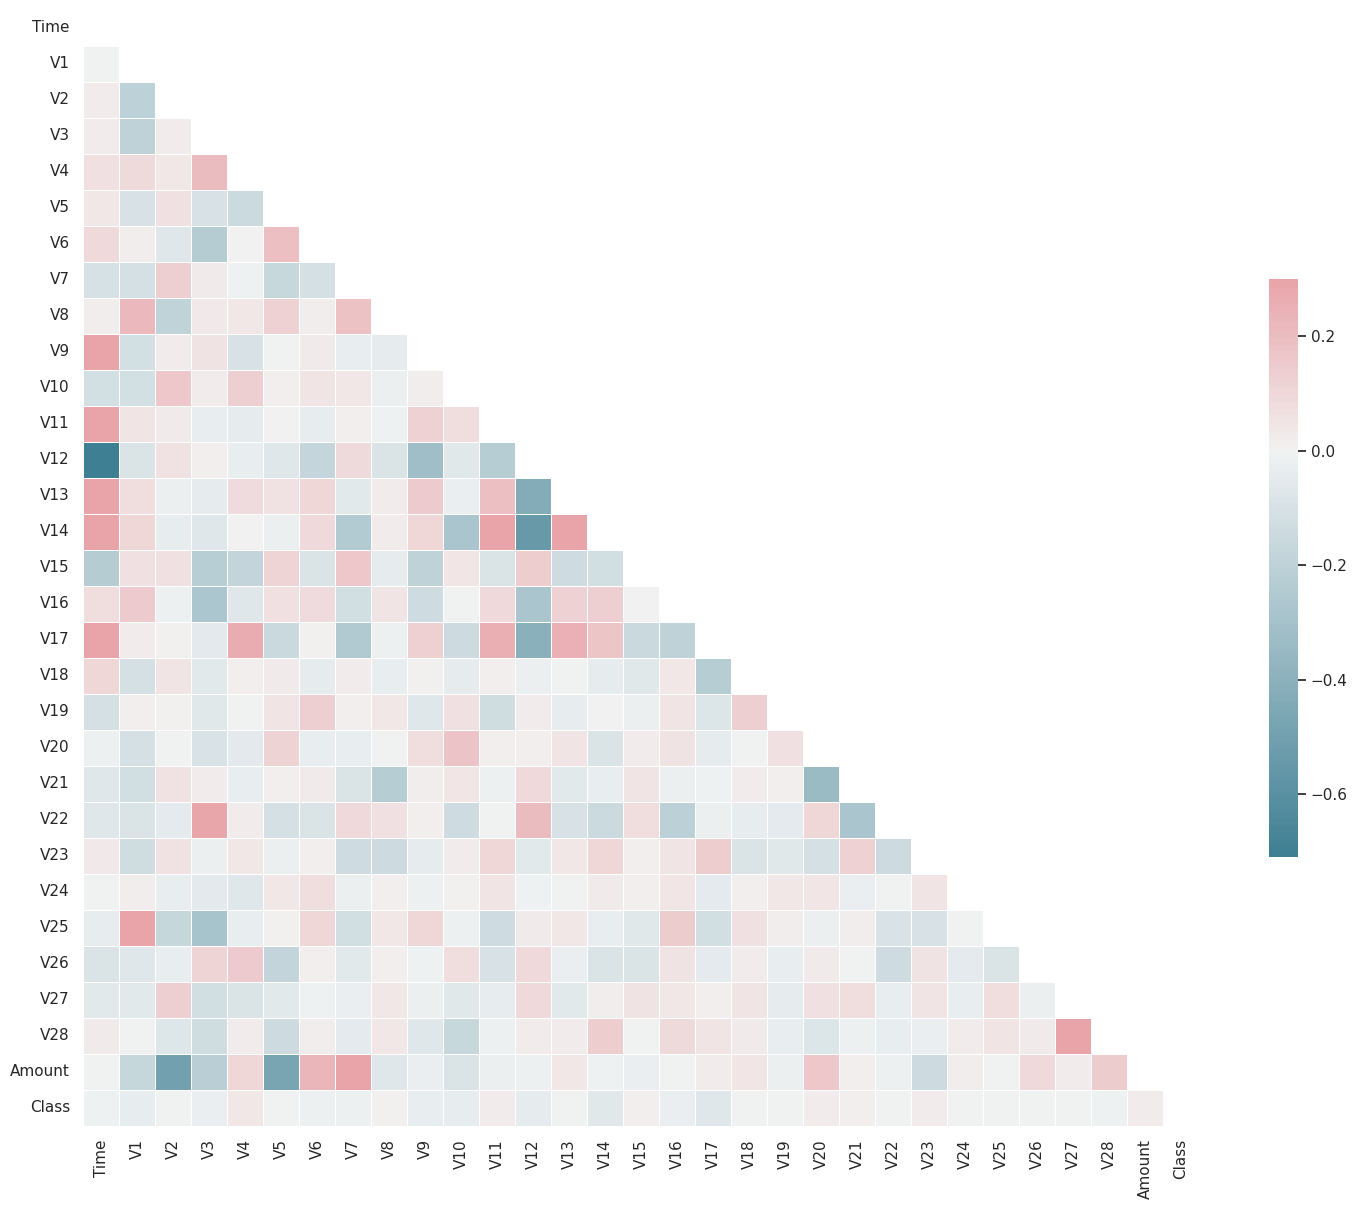

In [8]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18        True
V19        True
V20        True
V21        True
V22        True
V23        True
V24        True
V25        True
V26        True
V27        True
V28        True
Amount     True
Class      True
dtype: bool

**Feature Scaling**

In [10]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [12]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0.439322
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.324053
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,1.629300
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0.303616
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,0.025604


In [13]:
  X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   V1                5974 non-null   float64
 1   V2                5974 non-null   float64
 2   V3                5974 non-null   float64
 3   V4                5974 non-null   float64
 4   V5                5974 non-null   float64
 5   V6                5974 non-null   float64
 6   V7                5974 non-null   float64
 7   V8                5974 non-null   float64
 8   V9                5974 non-null   float64
 9   V10               5974 non-null   float64
 10  V11               5974 non-null   float64
 11  V12               5974 non-null   float64
 12  V13               5974 non-null   float64
 13  V14               5974 non-null   float64
 14  V15               5974 non-null   float64
 15  V16               5974 non-null   float64
 16  V17               5974 non-null   float64


In [15]:
y.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


**Model Training**

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [27]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Replace NaN values with the mean
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0,
                                    criterion = 'gini',  splitter='best', min_samples_leaf=1, min_samples_split=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


results = pd.DataFrame([['Decision tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.998884,0.0,0.0,0.0


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)


<ipython-input-31-2c34d3af780d>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-31-2c34d3af780d>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [32]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.998884,0.0,0.0,0.0
1,Random Forest (n=100),0.998884,0.0,0.0,0.0


**Artificial Neural Network Model**

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
131/131 [==============================] - 1s 2ms/step - loss: 0.4189 - accuracy: 0.9993
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9998
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9998
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9998
Epoch 5/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9998
Epoch 6/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9998
Epoch 7/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.9998
Epoch 8/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.9998
Epoch 9/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 10/100
131/131 [==============================] - 0s 2ms/step - loss: 9.1754e-04 - ac

In [34]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

56/56 [==============================] - 0s 1ms/step


In [35]:
score = classifier.evaluate(X_test, y_test)
score

56/56 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.9989


[0.042232222855091095, 0.9988839030265808]

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [37]:
cm

array([[1790,    0],
       [   2,    0]])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1790
         1.0       0.00      0.00      0.00         2

    accuracy                           1.00      1792
   macro avg       0.50      0.50      0.50      1792
weighted avg       1.00      1.00      1.00      1792



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Data Accuracy: 0.9989


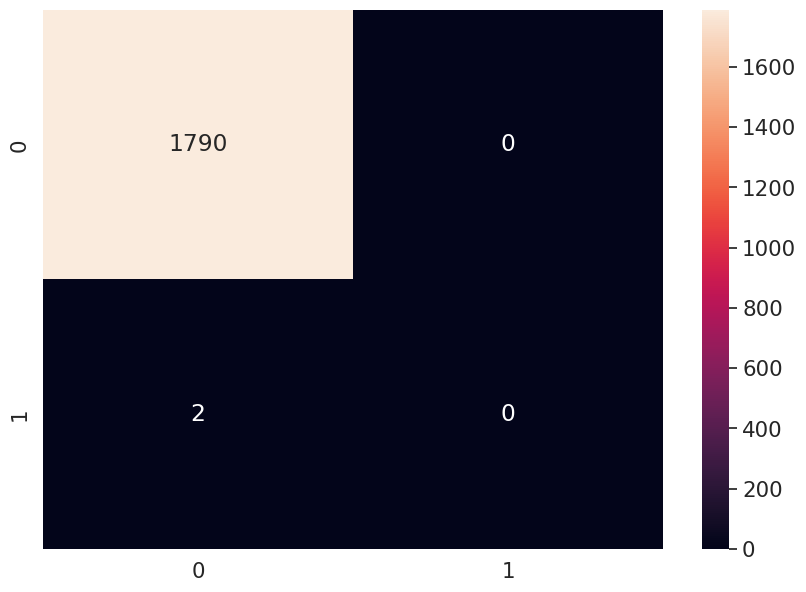

In [39]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))